# 과소적합 (underfitting)

우리가 공부했던 과적합을 실험적으로 구현해보겠습니다.  
이진분류에서 다뤘던 신경망과 IMDB 데이터셋으로요.  
![](https://drive.google.com/thumbnail?id=1qyTwfr1hPiFzpAflIPrlbjykCY9XGUT3&sz=s4000)

---
앞에서처럼 훈련 데이터를 직접 나눌수도 있지만 [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#fit)메서드에서 validation_split 설정으로 편리하게 나눠서 학습시킬수 있습니다.  
0과 1사의 값으로 검증데이터의 비율을 지정해줍니다.  
입력 뉴런의 개수는 데이터가 입력될때 결정됩니다.  
`input_shape`을 정의하지 않은 경우는 첫번째 데이터가 입력될때 그 데이터의 피처수로 입력 뉴런수가 결정이 됩니다.

In [1]:
from tensorflow import keras
from keras.datasets import imdb
from keras import models
from keras.layers import Dense
from tensorflow.keras.utils import plot_model
import numpy as np

(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

train_data = vectorize_sequences(train_data)

original_model = keras.Sequential([
    Dense(16, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1, activation="sigmoid")])

original_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

original_hist = original_model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6563 - loss: 0.6245 - val_accuracy: 0.8467 - val_loss: 0.4229
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8855 - loss: 0.3671 - val_accuracy: 0.8702 - val_loss: 0.3458
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9153 - loss: 0.2646 - val_accuracy: 0.8913 - val_loss: 0.2887
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9374 - loss: 0.2059 - val_accuracy: 0.8862 - val_loss: 0.2833
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9488 - loss: 0.1727 - val_accuracy: 0.8652 - val_loss: 0.3381
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9552 - loss: 0.1496 - val_accuracy: 0.8799 - val_loss: 0.3068
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9636 - loss: 0.1234 - val_accuracy: 0.8878 - val_loss: 0.2916
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9705 - loss: 0.1056 - val_accuracy: 0.8794 - v

은닉층의 뉴런수를 16에서 4로 줄인 작은 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/thumbnail?id=1ej6ZYCbe5_Lc8HNAVxcpEkkfV_9tUO8a&sz=s4000)

In [2]:
smaller_model = keras.Sequential([
    Dense(4, activation="relu"),
    Dense(4, activation="relu"),
    Dense(1, activation="sigmoid")])

smaller_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

smaller_model_hist = smaller_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.6847 - loss: 0.6243 - val_accuracy: 0.8460 - val_loss: 0.4752
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8808 - loss: 0.4323 - val_accuracy: 0.8738 - val_loss: 0.3861
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9054 - loss: 0.3352 - val_accuracy: 0.8826 - val_loss: 0.3368
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9145 - loss: 0.2802 - val_accuracy: 0.8889 - val_loss: 0.3072
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9308 - loss: 0.2357 - val_accuracy: 0.8922 - val_loss: 0.2898
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9386 - loss: 0.2089 - val_accuracy: 0.8935 - val_loss: 0.2798
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9440 - loss: 0.1854 - val_accuracy: 0.8879 - val_loss: 0.2795
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9537 - loss: 0.1616 - val_accuracy: 0.8914 - va

작은 모델의 파라미터 개수가 중간모델의 4분의 1밖에 안됩니다.  
훈련데이터의 정보를 저장할 수 있는 용량이 4분의 1밖에 안된다는 뜻이지요.

In [3]:
original_model.summary()
smaller_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 4)              │        40,004 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,060 (312.74 KB)

 Trainable params: 40,029 (156.36 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 40,031 (156.38 KB)

훈련데이터에 대해서는 중간 신경망의 손실함수값이 작은 신경망보다 빠르게 감소합니다.  
중간 신경망의 메모리가 더 커서 훈련 데이터의 정보를 빠르고 많이 습득하기 때문이겠죠.

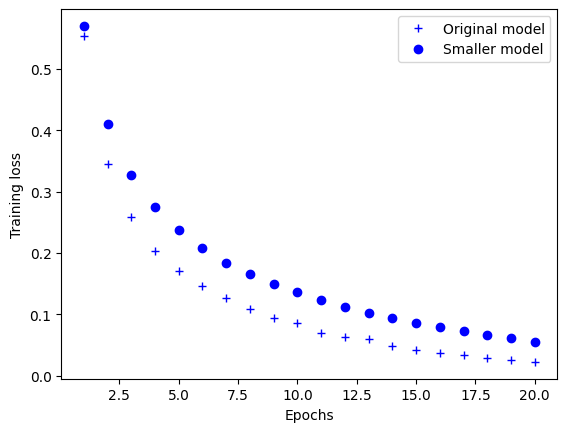

In [4]:
import matplotlib.pyplot as plt

epochs = range(1, 21)
original_train_loss = original_hist.history['loss']
smaller_model_train_loss = smaller_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_train_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 작은 신경망에서 과적합이 더 늦게 그리고 더 완만히 진행됩니다.

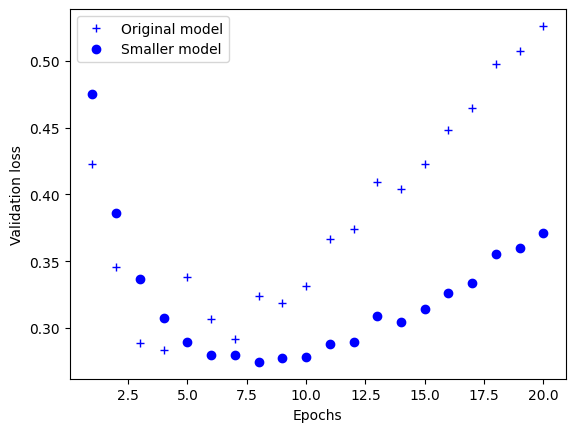

In [5]:
original_val_loss = original_hist.history['val_loss']
smaller_model_val_loss = smaller_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, smaller_model_val_loss, 'bo', label='Smaller model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# 과대적합 (overfitting)

은닉층의 뉴런수를 16에서 512로 늘린 큰 신경망을 만들고 학습시켜 보겠습니다.  
![](https://drive.google.com/thumbnail?id=1q0daZATKf8vTpHRtPelk0bcu9_CcgbLz&sz=s4000)

In [6]:
bigger_model = keras.Sequential([
    Dense(512, activation="relu"),
    Dense(512, activation="relu"),
    Dense(1, activation="sigmoid")])

bigger_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

bigger_model_hist = bigger_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 83ms/step - accuracy: 0.6304 - loss: 0.6321 - val_accuracy: 0.8614 - val_loss: 0.3359
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8406 - loss: 0.4005 - val_accuracy: 0.8783 - val_loss: 0.2936
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9019 - loss: 0.2502 - val_accuracy: 0.8898 - val_loss: 0.2724
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9289 - loss: 0.1862 - val_accuracy: 0.8884 - val_loss: 0.2791
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9634 - loss: 0.1128 - val_accuracy: 0.8750 - val_loss: 0.3252
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.9668 - loss: 0.0988 - val_accuracy: 0.8712 - val_loss: 0.3659
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.9757 - loss: 0.0808 - val_accuracy: 0.8873 - val_loss: 0.3528
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9875 - loss: 0.0492 - val_accuracy: 0.8861 - v

큰 모델의 파라미터 개수가 중간모델의 무려 33배나 됩니다.  
기억 용량도 33배라는 뜻이지요.

In [7]:
original_model.summary()
bigger_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,612 (1.22 MB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 160,307 (626.20 KB)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 512)            │     5,120,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,767,364 (41.07 MB)

 Trainable params: 5,383,681 (20.54 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,383,683 (20.54 MB)

훈련데이터에 대해서는 큰 신경망의 손실함수값이 빠르게 0으로 떨어집니다.  
그런데 학습 중간에 튀는 불안정한 현상을 볼수 있네요.

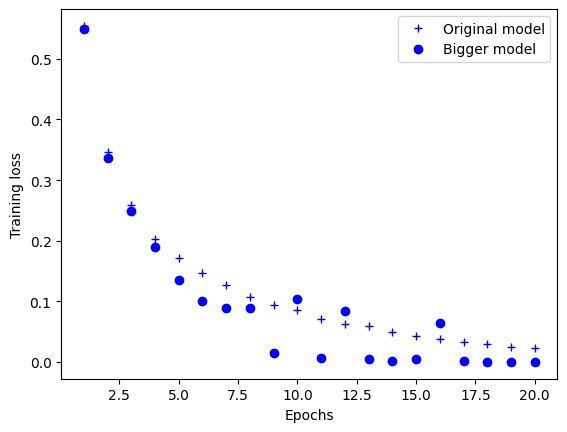

In [8]:
original_train_loss = original_hist.history['loss']
bigger_model_train_loss = bigger_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_train_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

검증데이터에 대해서는 큰 신경망에서 과적합이 더 빨리 그리고 더 가파르게 그리고 더 불안정하게 진행됩니다.

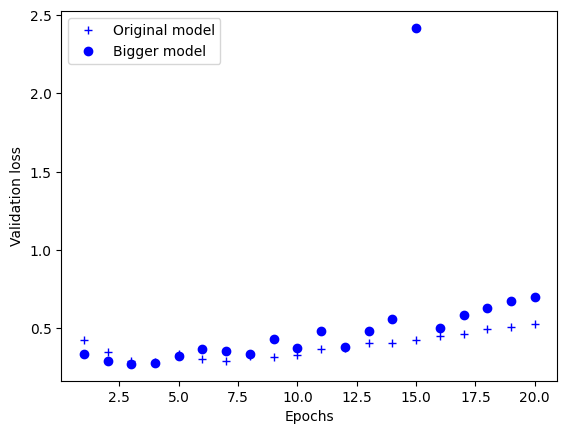

In [9]:
bigger_model_val_loss = bigger_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, bigger_model_val_loss, 'bo', label='Bigger model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^2$-규제 ($L^2$-regularization)

우리는 $L^2$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^2$ 페널티 ${1 \over 2} \times \lambda \times \sum w_{i,j}^2$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^2$-페널티의 그레디언트의 반대방향 업데이트는 신경망의 가중치를 비슷하게 만드려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L2](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L2)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [10]:
from tensorflow.keras import regularizers

l2_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l2(0.002), activation="relu"),
    Dense(1, activation="sigmoid")])

l2_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l2_model_hist = l2_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6974 - loss: 0.6807 - val_accuracy: 0.8642 - val_loss: 0.4739
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8922 - loss: 0.4245 - val_accuracy: 0.8790 - val_loss: 0.3969
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9174 - loss: 0.3378 - val_accuracy: 0.8877 - val_loss: 0.3663
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9245 - loss: 0.3002 - val_accuracy: 0.8806 - val_loss: 0.3722
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9303 - loss: 0.2808 - val_accuracy: 0.8870 - val_loss: 0.3558
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9470 - loss: 0.2483 - val_accuracy: 0.8843 - val_loss: 0.3616
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9489 - loss: 0.2434 - val_accuracy: 0.8740 - val_loss: 0.3852
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9493 - loss: 0.2309 - val_accuracy: 0.8816 - v

$L^2$-규제된 신경망은 학습데이터의 손실함수값이 일정 수준 이하로는 내려오질 않네요.

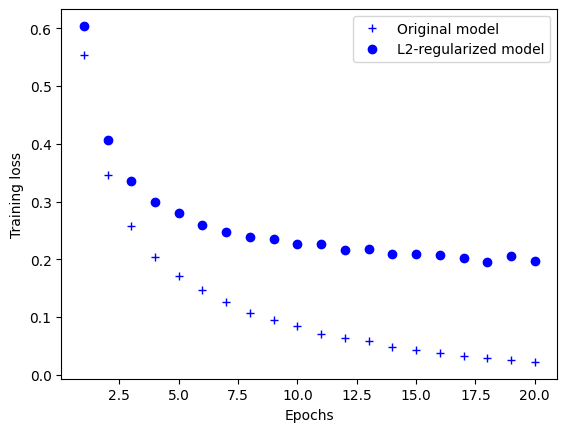

In [11]:
l2_model_loss = l2_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

$L^2$-규제된 신경망은 과적합이 억제되고 있습니다.

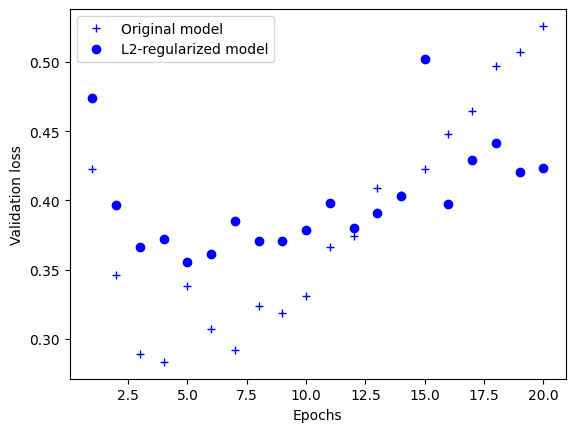

In [12]:
l2_model_val_loss = l2_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, l2_model_val_loss, 'bo', label='L2-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습1] (10분) 가중치 감소 계수 $\lambda$를 약하게 $0.0002$로 잡은 모델과 강하게 $0.02$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6842 - loss: 0.6079 - val_accuracy: 0.8657 - val_loss: 0.3929
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8924 - loss: 0.3405 - val_accuracy: 0.8866 - val_loss: 0.3182
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9243 - loss: 0.2488 - val_accuracy: 0.8821 - val_loss: 0.3084
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9405 - loss: 0.2006 - val_accuracy: 0.8704 - val_loss: 0.3317
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9479 - loss: 0.1745 - val_accuracy: 0.8898 - val_loss: 0.2933
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9578 - loss: 0.1531 - val_accuracy: 0.8870 - val_loss: 0.3017
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9616 - loss: 0.1408 - val_accuracy: 0.8838 - val_loss: 0.3174
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9706 - loss: 0.1222 - val_accuracy: 0.8824 - v

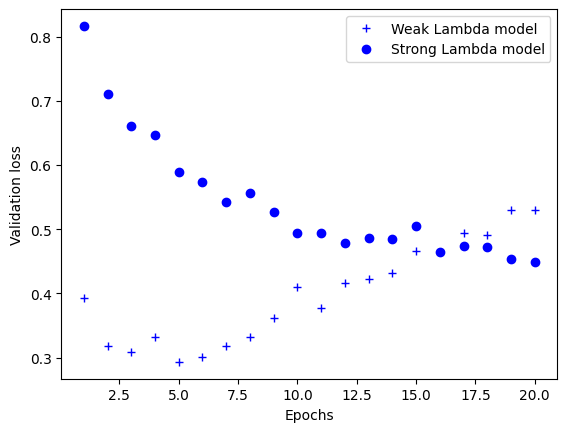

In [13]:
weak_lambda_model = models.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation='relu'),
    Dense(16, kernel_regularizer=regularizers.l2(0.0002), activation='relu'),
    Dense(1, activation='sigmoid')
])

weak_lambda_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

weak_lambda_model_hist = weak_lambda_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)


strong_lambda_model = models.Sequential([
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation='relu'),
    Dense(16, kernel_regularizer=regularizers.l2(0.02), activation='relu'),
    Dense(1, activation='sigmoid')
])

strong_lambda_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

strong_lambda_model_hist = strong_lambda_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

weak_lambda_model_val_loss = weak_lambda_model_hist.history['val_loss']
strong_lambda_model_val_loss = strong_lambda_model_hist.history['val_loss']

plt.plot(epochs, weak_lambda_model_val_loss, 'b+', label='Weak Lambda model')
plt.plot(epochs, strong_lambda_model_val_loss, 'bo', label='Strong Lambda model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

# $L^1$-규제 ($L^1$-regularization)

우리는 $L^1$-규제에 대해 공부했습니다.  
기존 손실함수에 $L^1$ 페널티 ${1 \over 2} \times \lambda \times \sum |w_{i,j}|$를 더합니다.  
여기서 $w_{i,j}$는 모든 가중치를 뜻합니다.  
가중치 감소 계수 $\lambda$는 직접 설정해야 하는 하이퍼 파라미터입니다.  
크게 잡으면 페널티가 큰 역할을 하고 작게 잡으면 페널티 역할이 작아집니다.  
미분은 선형이기 때문에 새로운 손실함수의 그레디언트는 기존 손실함수의 그레디언트와 페널티의 그레디언트를 합한 것과 같습니다.  
경사하강법을 적용하면 각 그레디언트의 반대방향의 합으로 가중치를 업데이트합니다.  
각각은 정반대 역할을 합니다.  
기존 손실함수의 그레디언트의 반대방향으로 업데이트하면 신경망은 훈련데이터의 정보를 더 담아냅니다.  
$L^1$-페널티의 그레디언트의 반대방향 업데이트는 절대값이 작은 가중치를 아예 없애버리려는 경향이 있습니다.  
이는 습득한 정보를 뭉게버리는 효과가 있습니다.  
케라스에서는 [tf.keras.regularizers.L1](https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1)를 통해 구현되어 있습니다.  
[Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) 클래스에서 인수로 설정할 수 있습니다.

In [14]:
l1_model = keras.Sequential([
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(16, kernel_regularizer=regularizers.l1(0.001), activation="relu"),
    Dense(1, activation="sigmoid")])

l1_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

l1_model_hist = l1_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6918 - loss: 1.6155 - val_accuracy: 0.8465 - val_loss: 0.7042
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8397 - loss: 0.6744 - val_accuracy: 0.8502 - val_loss: 0.6403
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8557 - loss: 0.6157 - val_accuracy: 0.8489 - val_loss: 0.6103
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8637 - loss: 0.5816 - val_accuracy: 0.8560 - val_loss: 0.5906
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8579 - loss: 0.5732 - val_accuracy: 0.8400 - val_loss: 0.5947
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8646 - loss: 0.5568 - val_accuracy: 0.8481 - val_loss: 0.5835
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8618 - loss: 0.5587 - val_accuracy: 0.8655 - val_loss: 0.5528
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8748 - loss: 0.5346 - val_accuracy: 0.8630 - v

**[실습2] (5분) 기본 신경망과 $L^1$-규제된 신경망의 훈련데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

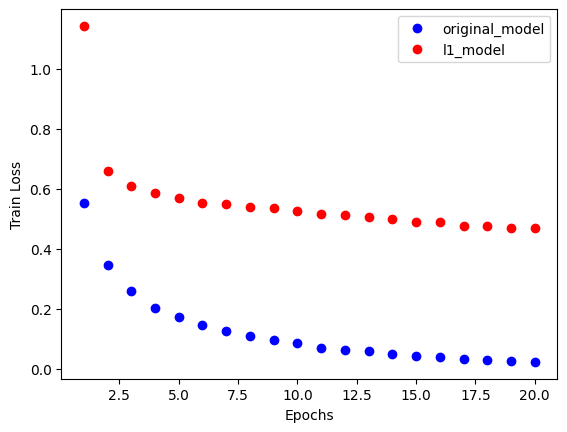

In [17]:
l1_model_train_loss = l1_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'bo', label='original_model')
plt.plot(epochs, l1_model_train_loss, 'ro', label='l1_model')
plt.xlabel('Epochs')
plt.ylabel('Train Loss')
plt.legend()
plt.show()

**[실습3] (5분) 기본 신경망과 $L^1$-규제된 신경망의 검증데이터에 대한 손실함수값 히스토리를 그래프로 그리시오.**

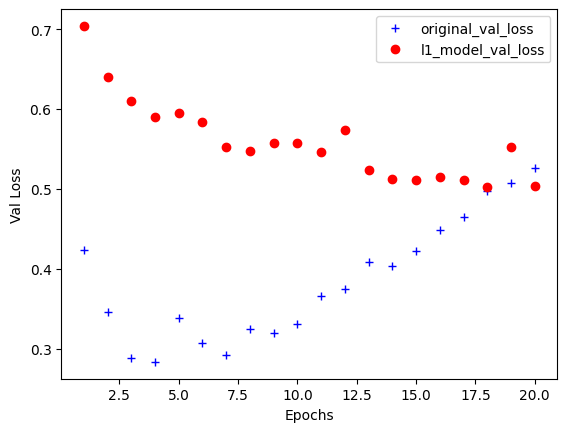

In [20]:
l1_model_val_loss = l1_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='original_val_loss')
plt.plot(epochs, l1_model_val_loss, 'ro', label='l1_model_val_loss')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()
plt.show()


# Dropout

이전에 공부한 dropout을 케라스로 구현하겠습니다.  
dropout은 학습 데이터가 들어올때마다 무작위로 뉴런을 삭제해서 신호전달을 차단하는 기법입니다.  
이상해보이지만 과적합 억제를 위해 매우 많이 사용되는 기법입니다.  
케라스에는 [Dropout층](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout)이 구현되어 있습니다.  
몇 퍼센트를 삭제할지 인수로 지정해 줍니다.  
![](https://drive.google.com/thumbnail?id=1wPtyMrgWXGxiJp0YofJPGlYDDE94uoX-&sz=s4000)

c:\Users\USER\miniconda3\envs\venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5720 - loss: 0.6729 - val_accuracy: 0.8001 - val_loss: 0.5681
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7185 - loss: 0.5702 - val_accuracy: 0.8694 - val_loss: 0.4641
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7933 - loss: 0.4837 - val_accuracy: 0.8771 - val_loss: 0.3835
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8397 - loss: 0.4142 - val_accuracy: 0.8741 - val_loss: 0.3445
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8647 - loss: 0.3714 - val_accuracy: 0.8779 - val_loss: 0.3290
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8853 - loss: 0.3225 - val_accuracy: 0.8901 - val_loss: 0.2916
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9053 - loss: 0.2805 - val_accuracy: 0.8855 - val_loss: 0.2824
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9141 - loss: 0.2536 - val_accuracy: 0.8822 - v

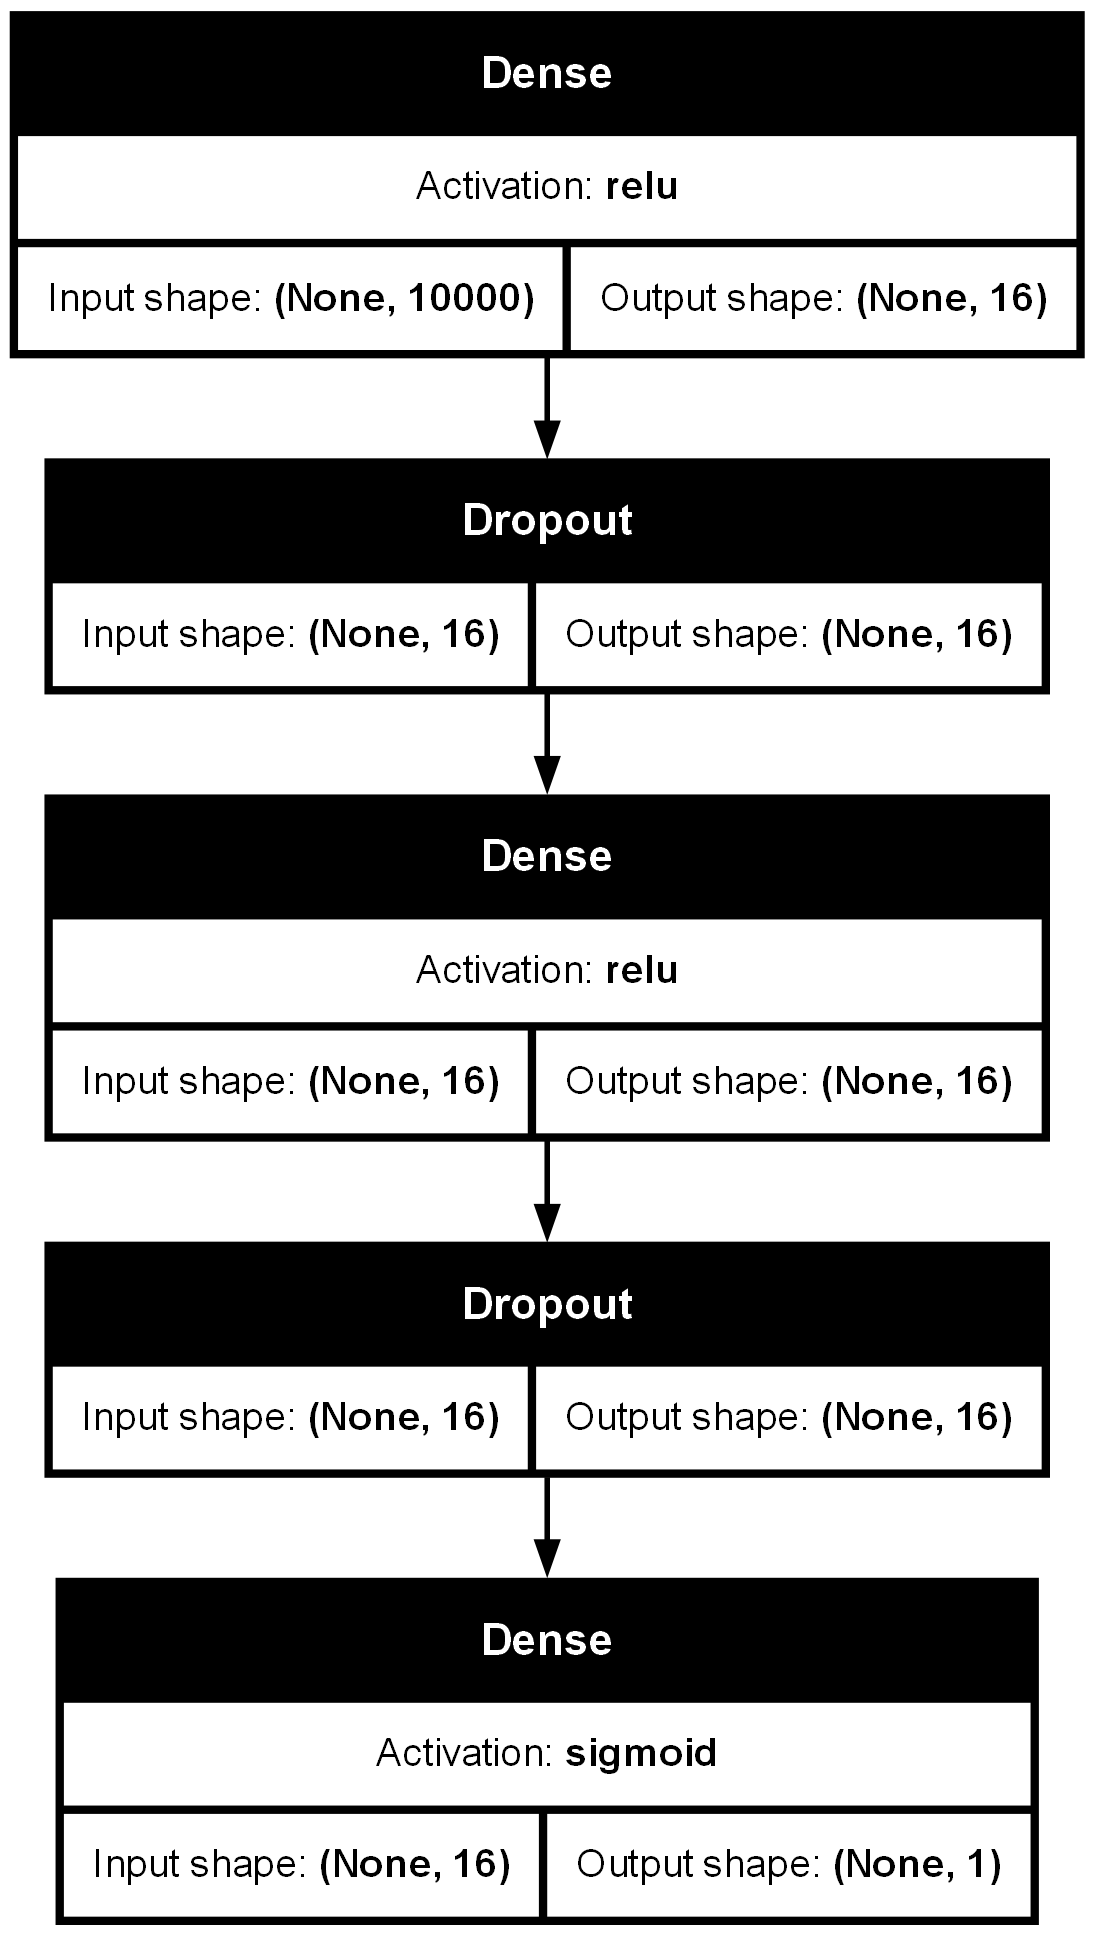

In [21]:
from tensorflow.keras.utils import plot_model
from keras.layers import Dropout

dropout_model = keras.Sequential([
    Dense(16, input_shape=(10000,), activation="relu"),
    Dropout(0.5),
    Dense(16, activation="relu"),
    Dropout(0.5),
    Dense(1, activation="sigmoid")])

dropout_model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

dropout_model_hist = dropout_model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

plot_model(dropout_model, show_shapes=True, show_layer_activations=True)

dropout층이 추가된 신경망은 학습데이터의 손실함수값이 천천히 떨어지네요.

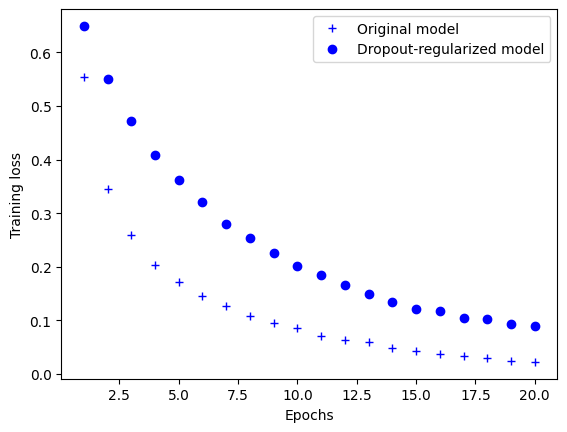

In [22]:
dropout_model_loss = dropout_model_hist.history['loss']

plt.plot(epochs, original_train_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Training loss')
plt.legend()

plt.show()

dropout층이 추가된 신경망은 과적합이 늦게 시작되고 더 완만하게 진행됩니다.

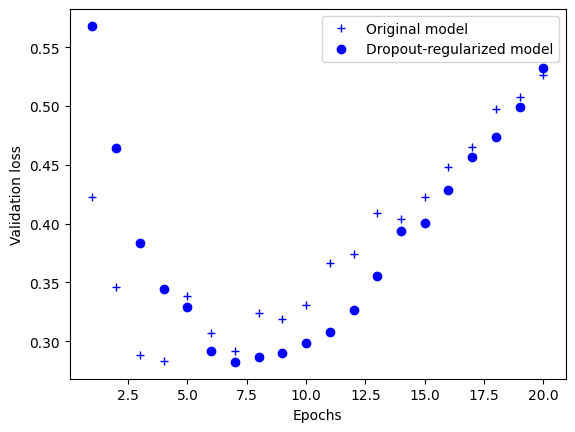

In [23]:
dropout_model_val_loss = dropout_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'b+', label='Original model')
plt.plot(epochs, dropout_model_val_loss, 'bo', label='Dropout-regularized model')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

**[실습4] (10분) dropout 비율을 약하게 $0.2$로 잡은 모델과 강하게 $0.8$로 잡은 모델을 학습시키고 검증데이터의 손실함수 히스토리를 그래프로 그리시오.**

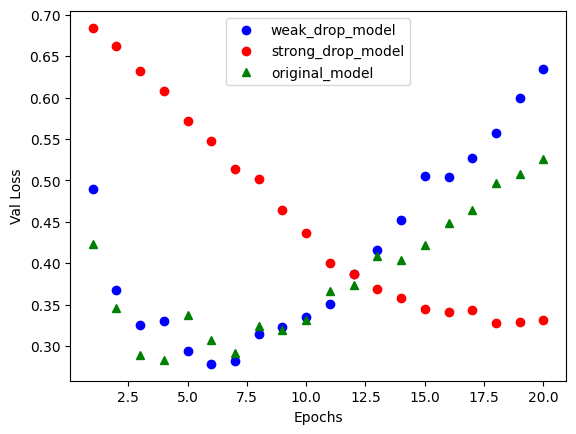

In [26]:
weak_drop_model = models.Sequential([
    Dense(16, input_shape=(10000,), activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

weak_drop_model.compile(
    optimizer='rmsprop',
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

weak_drop_model_hist = weak_drop_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=0)

strong_drop_model = models.Sequential([
    Dense(16, input_shape=(10000,), activation='relu'),
    Dropout(0.8),
    Dense(16, activation='relu'),
    Dropout(0.8),
    Dense(1, activation='sigmoid'),
])

strong_drop_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

strong_drop_model_hist = strong_drop_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=0)

weak_drop_model_val_loss = weak_drop_model_hist.history['val_loss']
strong_drop_model_val_loss = strong_drop_model_hist.history['val_loss']

plt.plot(epochs, weak_drop_model_val_loss, 'bo', label='weak_drop_model')
plt.plot(epochs, strong_drop_model_val_loss, 'ro', label='strong_drop_model')
plt.plot(epochs, original_val_loss, 'g^', label='original_model')
plt.xlabel('Epochs')
plt.ylabel('Val Loss')
plt.legend()
plt.show()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7046 - loss: 0.5766 - val_accuracy: 0.7819 - val_loss: 0.5559
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9286 - loss: 0.2125 - val_accuracy: 0.8674 - val_loss: 0.4690
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9696 - loss: 0.1153 - val_accuracy: 0.8553 - val_loss: 0.4171
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9886 - loss: 0.0616 - val_accuracy: 0.8668 - val_loss: 0.3764
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9970 - loss: 0.0330 - val_accuracy: 0.8573 - val_loss: 0.3587
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9985 - loss: 0.0183 - val_accuracy: 0.8381 - val_loss: 0.3751
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9997 - loss: 0.0092 - val_accuracy: 0.8452 - val_loss: 0.3615
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9998 - loss: 0.0052 - val_accuracy: 0.8618 - v

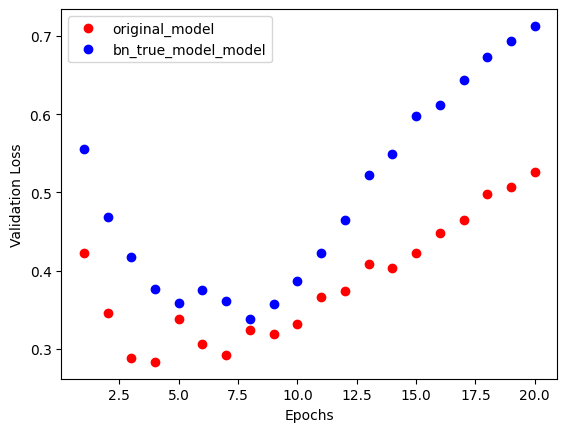

In [30]:
from keras.layers import BatchNormalization

bn_true_model = keras.Sequential([
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid'),
])

bn_true_model.compile(
    optimizer='rmsprop',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

bn_true_model_hist = bn_true_model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_split=0.4, verbose=1)

bn_true_model_val_loss = bn_true_model_hist.history['val_loss']

plt.plot(epochs, original_val_loss, 'ro', label='original_model')
plt.plot(epochs, bn_true_model_val_loss, 'bo', label='bn_true_model_model')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

In [ ]:
# 가중치 초기화 적용하기

from keras import initializers

model = keras.Sequential([
    Dense(16, kernel_initializer=initializers.HeNormal(), activation='relu'),
    Dense(16, kernel_initializer=initializers.GlorotNormal(), activation='relu'),
    Dense(16, kernel_initializer=initializers.RandomNormal(mean=0.0, stddev=0.05), activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [32]:
# 모델 저장하기
bn_true_model.save('bn_model.keras')
# tensorflow 버전이 2.15 이전이면 : .h5
# tensorflow 버전이 2.15 이후면 : .keras

In [33]:
# 모델 불러오기
bn_model_new = keras.models.load_model('bn_model.keras')
bn_model_new.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_51 (Dense)                │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 320,804 (1.22 MB)

 Trainable params: 160,369 (626.44 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 160,371 (626.45 KB)

##### decay

- 규제 : L1, L2(weight_decay)
    - weight_decay = 0.001
    - Dense(16, kernel_regularizer=regularizers.l2(weight_decay), activation='relu')

#### learning rate를 점차 줄여가고 싶을 때
- step decay
- ~ decay (앞에 뭐가 붙은 decay)
- ※ optimizer RMSprop이 알아서 줄여줌

#### RMSPorp 과 Learning rate Decay의 차이

1. RMSProp : 매개변수 적응형
    - 매개변수가 변화량이 크면 Learning rate를 줄여줘야 한다.
2. LR : 아주 정밀한 학습을 위해
    - 손실함수 종류가 엄청 많은데 그 그래프를 다 그려보면 로컬 미니마가 많아서 아주 정밀한 학습이 필요하다.
    - 처음에는 크게했다가 나중에 줄여가면서 해야 한다.